In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
sales = pd.read_csv("Amazon Sales data.csv")
sales.head()                    

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
sales.shape

(100, 14)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
sales.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [6]:
sales.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Which regions have the highest total sales revenue?

In [7]:
Highest_Total_Revenue = sales.groupby(sales["Region"])["Total Revenue"].sum()
Highest_Total_Revenue.idxmax()

'Sub-Saharan Africa'

In [8]:
group_data = sales.groupby(sales["Region"])["Total Revenue"].sum()
group_data

Region
Asia                                 21347091.02
Australia and Oceania                14094265.13
Central America and the Caribbean     9170385.49
Europe                               33368932.11
Middle East and North Africa         14052706.58
North America                         5643356.55
Sub-Saharan Africa                   39672031.43
Name: Total Revenue, dtype: float64

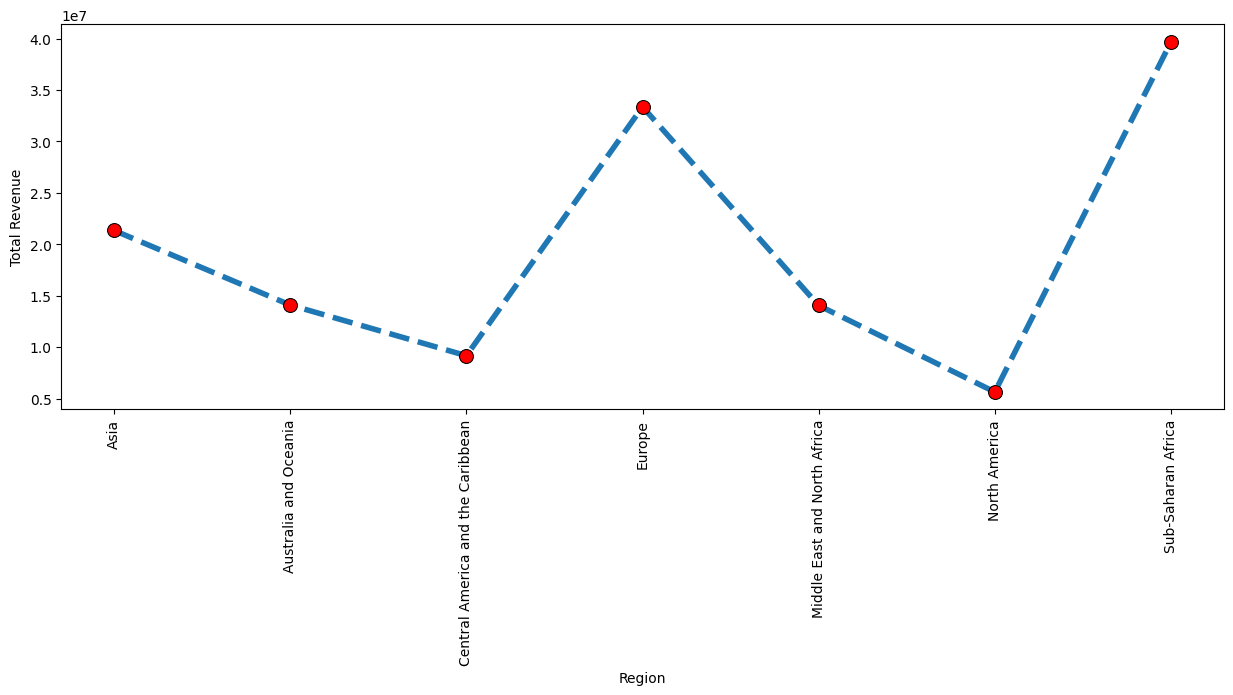

In [9]:
plt.figure(figsize=(15, 5))
sns.lineplot(
    data=group_data,
    linestyle="--",
    linewidth=4,
    marker="o",
    markersize=10,
    markerfacecolor="red",
    markeredgecolor="black",
)
plt.xticks(rotation=90)
plt.show()

What is the average unit price and unit cost for each item type?

In [10]:
Avg_Unit_Price = sales.groupby(sales["Item Type"])["Unit Price"].mean()
Avg_Unit_Cost = sales.groupby(sales["Item Type"])["Unit Cost"].mean()

In [11]:
Avg_Unit_Price

Item Type
Baby Food          255.28
Beverages           47.45
Cereal             205.70
Clothes            109.28
Cosmetics          437.20
Fruits               9.33
Household          668.27
Meat               421.89
Office Supplies    651.21
Personal Care       81.73
Snacks             152.58
Vegetables         154.06
Name: Unit Price, dtype: float64

In [12]:
Avg_Unit_Cost.idxmax()

'Office Supplies'

Which country has the highest total profit?

In [13]:
Highest_Profit = sales.groupby(sales["Country"])["Total Profit"].sum()
Highest_Profit.idxmax()

'Djibouti'

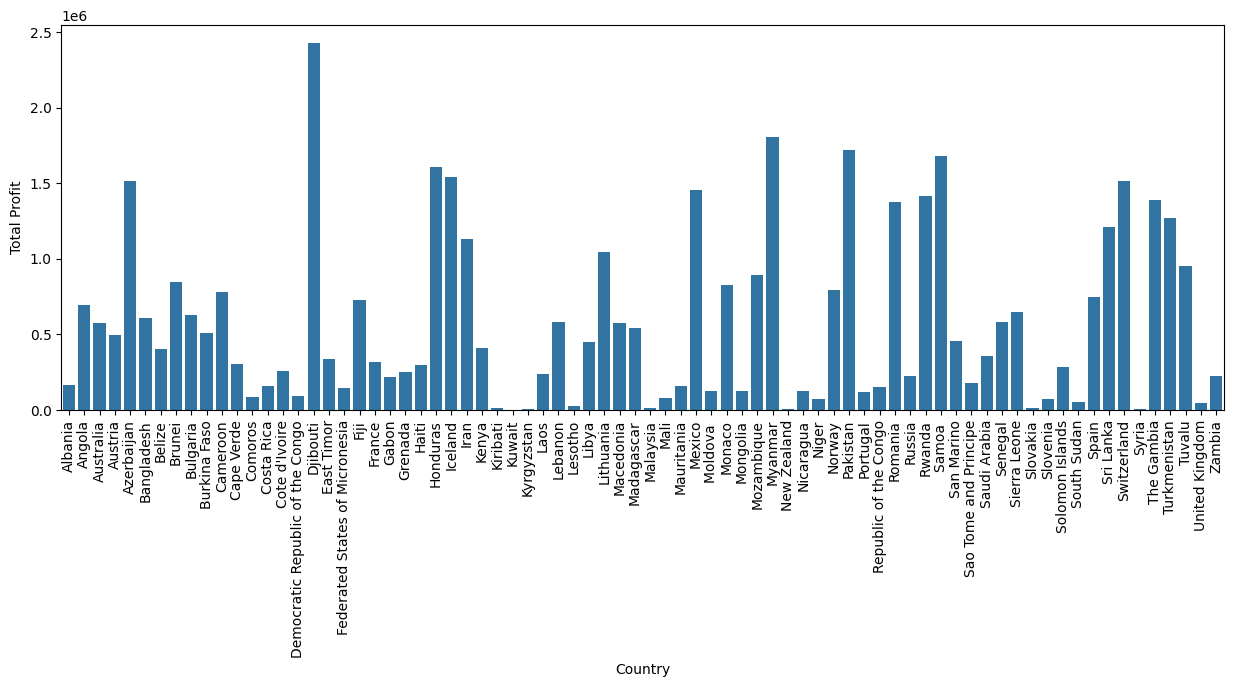

In [14]:
group_data = sales.groupby(sales["Country"])["Total Profit"].sum()
plt.figure(figsize=(15, 5))

sns.barplot(x=group_data.index, y=group_data)
plt.xticks(rotation=90)
plt.show()

How does the sales channel affect the order priority distribution?

In [15]:
Sales_Channel = sales.groupby(sales["Sales Channel"])["Order Priority"].value_counts()
Sales_Channel

Sales Channel  Order Priority
Offline        H                 17
               C                 13
               L                 12
               M                  8
Online         L                 15
               H                 13
               M                 13
               C                  9
Name: count, dtype: int64

In [16]:
Order_priority = (
    sales.groupby(["Sales Channel", "Order Priority"])["Order Priority"]
    .count()
    .reset_index(name="Count")
)
Order_priority

,Sales Channel,Order Priority,Count
0,Offline,C,13
1,Offline,H,17
2,Offline,L,12
3,Offline,M,8
4,Online,C,9
5,Online,H,13
6,Online,L,15
7,Online,M,13


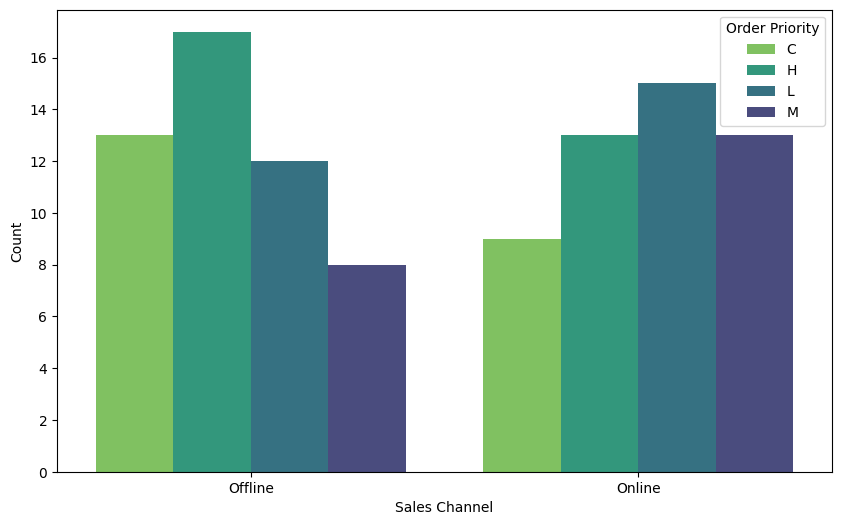

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Order_priority,
    x="Sales Channel",
    y="Count",
    hue="Order Priority",
    palette="viridis_r",
)
plt.show()

What is the average order processing time (duration between order and ship dates) for each sales channel?

In [18]:
sales["Order Date"] = pd.to_datetime(sales["Order Date"], format="mixed")
sales["Ship Date"] = pd.to_datetime(sales["Ship Date"], format="mixed")

In [19]:
sales["Processing Time"] = sales["Ship Date"] - sales["Order Date"]

In [20]:
sales.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.50,951410.50,30 days
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.8,328376.44,248406.36,24 days


In [21]:
Avg_Processing_Time = sales.groupby(sales["Sales Channel"])["Processing Time"].mean()
Avg_Processing_Time

Sales Channel
Offline   23 days 04:48:00
Online    23 days 12:28:48
Name: Processing Time, dtype: timedelta64[ns]

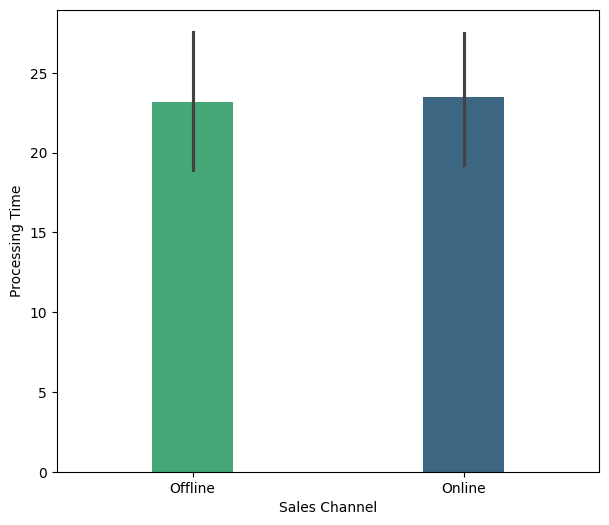

In [22]:
plt.figure(figsize=(7, 6))

sns.barplot(
    data=sales,
    x=sales["Sales Channel"],
    y=sales["Processing Time"].dt.days,
    palette="viridis_r",
    width=0.3,
    hue="Sales Channel",
)
plt.show()

Which item types have the highest and lowest total sales?

In [23]:
group_item_type = sales.groupby(sales["Item Type"])["Total Revenue"].sum()

highest_sales = group_item_type.idxmax()
lowest_sales = group_item_type.idxmin()

highest_sales

'Cosmetics'

In [24]:
lowest_sales

'Fruits'

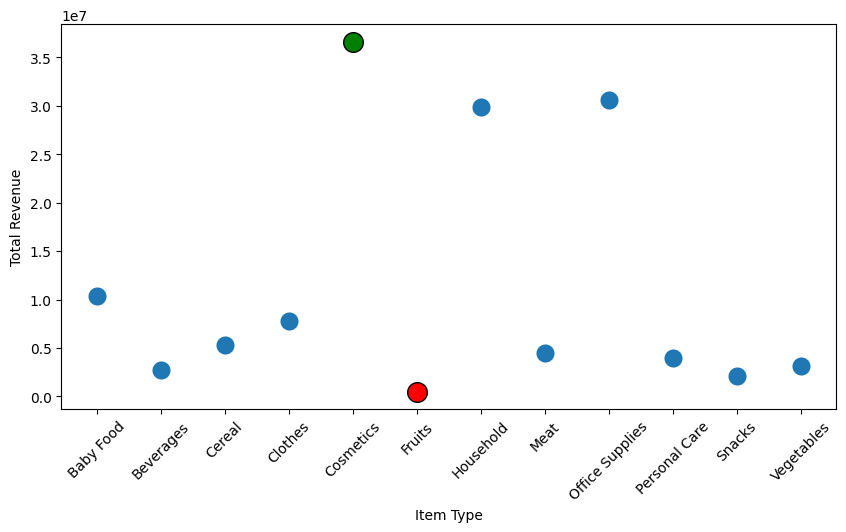

In [25]:
plt.figure(figsize=(10, 5))


sns.scatterplot(x=group_item_type.index, y=group_item_type, s=200)

max_index = group_item_type.idxmax()
plt.scatter(
    x=max_index, y=group_item_type[max_index], s=200, color="Green", edgecolor="black"
)


min_index = group_item_type.idxmin()
plt.scatter(
    x=min_index, y=group_item_type[min_index], s=200, color="RED", edgecolor="black"
)

plt.xticks(rotation=45)
plt.show()

How does the order priority vary across different regions?

In [26]:
Diff_regions_by_order_priority = sales.groupby(sales["Region"])[
    "Order Priority"
].value_counts()
Diff_regions_by_order_priority

Region                             Order Priority
Asia                               L                  4
                                   H                  3
                                   C                  2
                                   M                  2
Australia and Oceania              H                  5
                                   C                  4
                                   L                  1
                                   M                  1
Central America and the Caribbean  C                  2
                                   H                  2
                                   L                  2
                                   M                  1
Europe                             H                  7
                                   L                  6
                                   C                  5
                                   M                  4
Middle East and North Africa       L                  

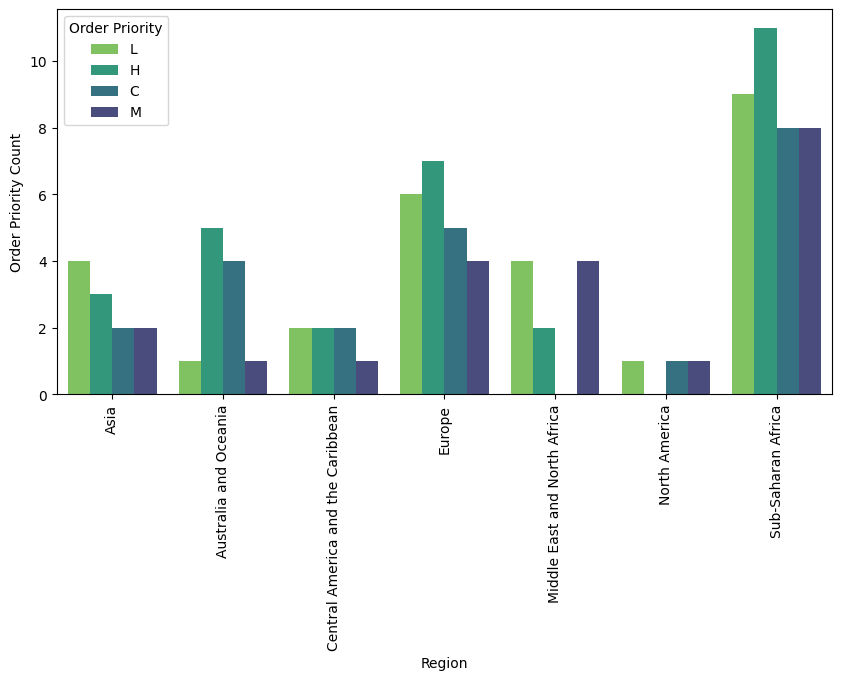

In [27]:
Diff_regions_by_order_priority = (
    sales.groupby(sales["Region"])["Order Priority"]
    .value_counts()
    .reset_index(name="Order Priority Count")
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=Diff_regions_by_order_priority,
    x="Region",
    y="Order Priority Count",
    hue="Order Priority",
    palette="viridis_r",
)

plt.xticks(rotation=90)
plt.show()

 What is the correlation between unit price and total profit?

In [28]:
Correlation_Unit_Price_Total_Profit = sales["Unit Price"].corr(sales["Total Profit"])
Correlation_Unit_Price_Total_Profit

np.float64(0.5573652488121267)

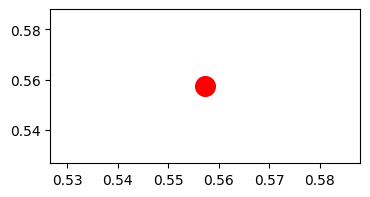

In [29]:
plt.figure(figsize=(4, 2))
plt.scatter(
    x=Correlation_Unit_Price_Total_Profit,
    y=Correlation_Unit_Price_Total_Profit,
    s=200,
    color="RED",
)

Are there any seasonal trends or patterns in the sales data?

In [30]:
month_names = {
    1: "JAN",
    2: "FEB",
    3: "MAR",
    4: "APR",
    5: "MAY",
    6: "JUN",
    7: "JUL",
    8: "AUG",
    9: "SEPT",
    10: "OCT",
    11: "NOV",
    12: "DEC",
}

monthly_sales = sales.groupby(sales["Order Date"].dt.month)["Total Revenue"].sum()
monthly_sales.index = monthly_sales.index.map(month_names)
monthly_sales

Order Date
JAN     10482467.12
FEB     24740517.77
MAR      2274823.87
APR     16187186.33
MAY     13215739.99
JUN      5230325.77
JUL     15669518.50
AUG      1128164.91
SEPT     5314762.56
OCT     15287576.61
NOV     20568222.76
DEC      7249462.12
Name: Total Revenue, dtype: float64

C:\Users\GAURAV BHATIYA\AppData\Local\Temp\ipykernel_6924\3040930015.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales, palette="viridis_r")


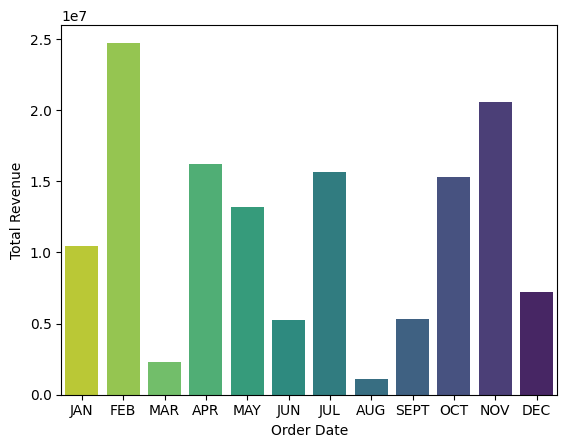

In [31]:
sns.barplot(x=monthly_sales.index, y=monthly_sales, palette="viridis_r")
plt.show()

How does the number of units sold vary across different countries?

In [32]:
Unit_sold_by_countries = (
    sales.groupby(sales["Country"])["Units Sold"].sum().reset_index(name="Unit Sold")
)

In [33]:
Unit_sold_by_countries

,Country,Unit Sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
...,...,...
71,The Gambia,14813
72,Turkmenistan,8840
73,Tuvalu,9925
74,United Kingdom,282


In [34]:
ran = sales.groupby(sales["Item Type"])['Unit Price']
ran

What is the distribution of unit prices for each item type?

In [35]:
unit_price_distribution = (
    sales.groupby(sales["Item Type"])["Unit Price"].sum().reset_index(name="Unit Price")
)
unit_price_distribution

,Item Type,Unit Price
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


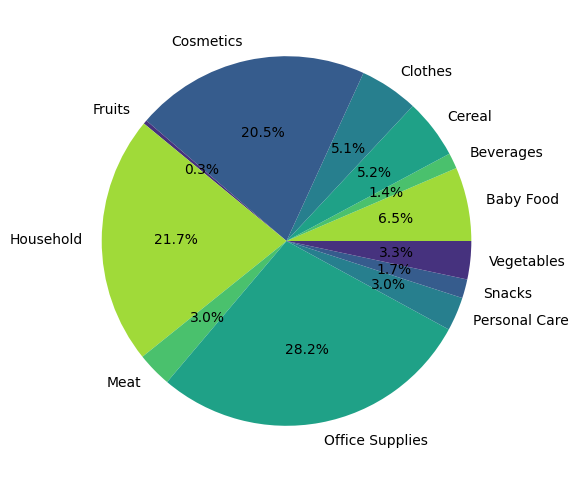

In [36]:
plt.figure(figsize=(15, 6))

palette_color = sns.color_palette('viridis_r') 

plt.pie(
    x=unit_price_distribution["Unit Price"],
    labels=unit_price_distribution["Item Type"],
    autopct="%1.1f%%",
    colors=palette_color,
    
)
plt.show()

Which sales channel has the highest average unit price?

In [37]:
Highest_avg_unit_price = (
    sales.groupby(sales["Sales Channel"])["Unit Price"].mean().reset_index(name="new")
)
Highest_avg_unit_price

,Sales Channel,new
0,Offline,310.7206
1,Online,242.8020


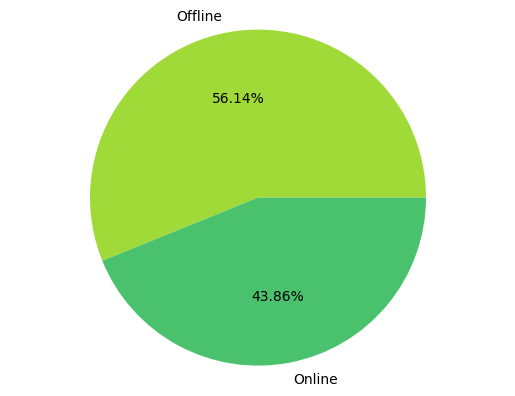

In [38]:
palette_color = sns.color_palette('viridis_r') 
plt.pie(
    x=Highest_avg_unit_price["new"],
    labels=Highest_avg_unit_price["Sales Channel"],
    colors=palette_color,
    autopct="%1.2f%%",
)
plt.axis("equal")
plt.show()